<a href="https://colab.research.google.com/github/roshank1605A04/Graduate-Admissions-Analysis/blob/master/GraduateAdmissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Importing Libraries and dataset**

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# reading the data

data = pd.read_csv('drive/My Drive/Projects/practice/Graduate Admissions/Admission_Predict_Ver1.1.csv')
data2 = pd.read_csv('drive/My Drive/Projects/practice/Graduate Admissions/Admission_Predict.csv')

# getting the shapes of the datasets
print("Shape of data1: ", data.shape)
print("Shape of data2 :", data2.shape)

Shape of data1:  (500, 9)
Shape of data2 : (400, 9)


**Exploratory Data Analysis**

In [0]:
# head of data1

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
data2.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
# combining both the datasets as they have same columns

data = pd.concat([data, data2])

# getting the shape of new dataset
data.shape

(900, 9)

In [0]:
# looking at the Sample of the dataset

data.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
214,215,331,117,4,4.5,5.0,9.42,1,0.94
14,15,311,104,3,3.5,2.0,8.20,1,0.61
181,182,305,107,2,2.5,2.5,8.42,0,0.71
343,344,305,103,2,2.5,3.5,8.13,0,0.59
158,159,306,106,2,2.0,2.5,8.14,0,0.61
333,334,319,108,3,3.0,3.5,8.54,1,0.71
331,332,311,105,2,3.0,2.0,8.12,1,0.73
294,295,316,101,2,2.5,2.0,8.32,1,0.61
472,473,327,116,4,4.0,4.5,9.48,1,0.90
121,122,334,119,5,4.5,4.5,9.48,1,0.94


In [0]:
# describing the dataset

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,228.277778,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,134.674991,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,113.000000,308.000000,103.000000,2.000000,2.500000,3.00000,8.140000,0.000000,0.640000
50%,225.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,338.000000,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


In [0]:
# getting the information of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           900 non-null int64
GRE Score            900 non-null int64
TOEFL Score          900 non-null int64
University Rating    900 non-null int64
SOP                  900 non-null float64
LOR                  900 non-null float64
CGPA                 900 non-null float64
Research             900 non-null int64
Chance of Admit      900 non-null float64
dtypes: float64(4), int64(5)
memory usage: 70.3 KB


In [0]:
# checking if the data contains any NULL values

data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [0]:
# Average GRE Score of the students

gre = data['GRE Score'].mean()
toefl = data['TOEFL Score'].mean()
cgpa = data['CGPA'].mean()

# sop - statement of purpose
# lor - letter of recommendation

sop = np.round(data['SOP'].mean())
lor = np.round(data['LOR '].mean())

research = np.round(data['Research'].mean())
uni_rating = np.round(data['University Rating'].mean())

# printing the results

print("The Average Score for GRE is {:.2f}".format(gre))
print("The Average Score for TOEFL is {:.2f}".format(toefl))
print("The Average CGPA is {:.2f}".format(cgpa))
print("The Average Number for Statement of Purpose is", sop)
print("The Average Number for Recommendation letters among the students is", lor)
print("The Average Number of Research done by students is ", research)
print("The Average University Ratings of Different Students is ", uni_rating)

The Average Score for GRE is 316.62
The Average Score for TOEFL is 107.29
The Average CGPA is 8.59
The Average Number for Statement of Purpose is 3.0
The Average Number for Recommendation letters among the students is 3.0
The Average Number of Research done by students is  1.0
The Average University Ratings of Different Students is  3.0


In [0]:
# Average GRE Score of the students

gre = data['GRE Score'].min()
toefl = data['TOEFL Score'].min()
cgpa = data['CGPA'].min()

# sop - statement of purpose
# lor - letter of recommendation

sop = np.round(data['SOP'].min())
lor = np.round(data['LOR '].min())

research = np.round(data['Research'].min())
uni_rating = np.round(data['University Rating'].min())

# printing the results

print("The Minimum Score for GRE is {:.2f}".format(gre))
print("The Minimum Score for TOEFL is {:.2f}".format(toefl))
print("The Minimum CGPA is {:.2f}".format(cgpa))
print("The Minimum Number for Statement of Purpose is", sop)
print("The Minimum Number for Recommendation letters among the students is", lor)
print("The Minimum Number of Research done by students is ", research)
print("The Minimum University Ratings of Different Students is ", uni_rating)

The Minimum Score for GRE is 290.00
The Minimum Score for TOEFL is 92.00
The Minimum CGPA is 6.80
The Minimum Number for Statement of Purpose is 1.0
The Minimum Number for Recommendation letters among the students is 1.0
The Minimum Number of Research done by students is  0
The Minimum University Ratings of Different Students is  1


In [0]:
# Average GRE Score of the students

gre = data['GRE Score'].max()
toefl = data['TOEFL Score'].max()
cgpa = data['CGPA'].max()

# sop - statement of purpose
# lor - letter of recommendation

sop = np.round(data['SOP'].max())
lor = np.round(data['LOR '].max())

research = np.round(data['Research'].max())
uni_rating = np.round(data['University Rating'].max())

# printing the results

print("The Maximum Score for GRE is {:.2f}".format(gre))
print("The Maximum Score for TOEFL is {:.2f}".format(toefl))
print("The Maximum CGPA is {:.2f}".format(cgpa))
print("The Maximum Number for Statement of Purpose is", sop)
print("The Maximum Number for Recommendation letters among the students is", lor)
print("The Maximum Number of Research done by students is ", research)
print("The Maximum University Ratings of Different Students is ", uni_rating)

The Maximum Score for GRE is 340.00
The Maximum Score for TOEFL is 120.00
The Maximum CGPA is 9.92
The Maximum Number for Statement of Purpose is 5.0
The Maximum Number for Recommendation letters among the students is 5.0
The Maximum Number of Research done by students is  1
The Maximum University Ratings of Different Students is  5


**Data Visualizations**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


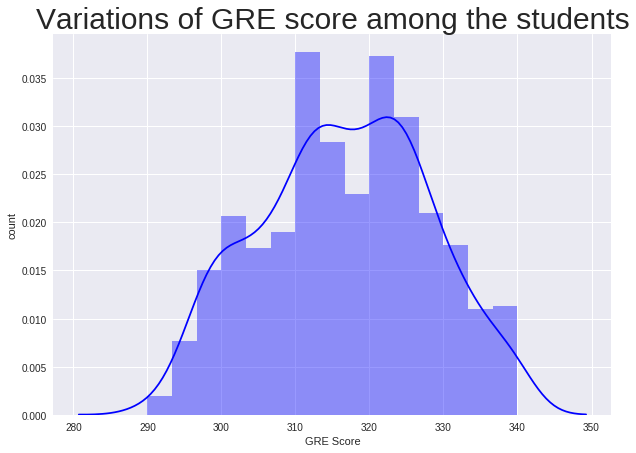

In [0]:
# looking at the variations of gre score among the students

sns.distplot(data['GRE Score'], color = 'blue')
plt.title('Variations of GRE score among the students', fontsize = 30)
plt.xlabel('GRE Score')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


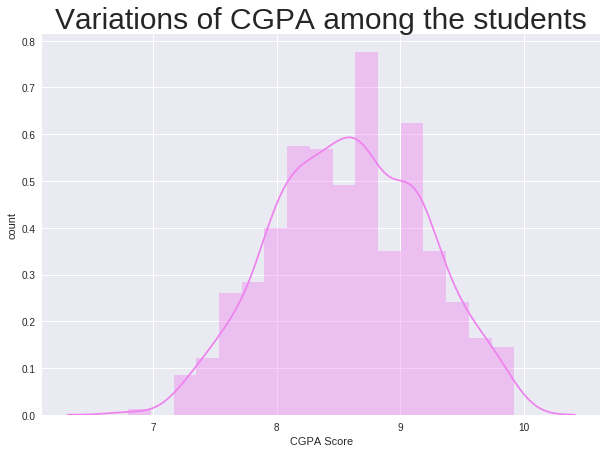

In [0]:
# looking at the variations of CGPA among the students

sns.distplot(data['CGPA'], color = 'violet')
plt.title('Variations of CGPA among the students', fontsize = 30)
plt.xlabel('CGPA Score')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


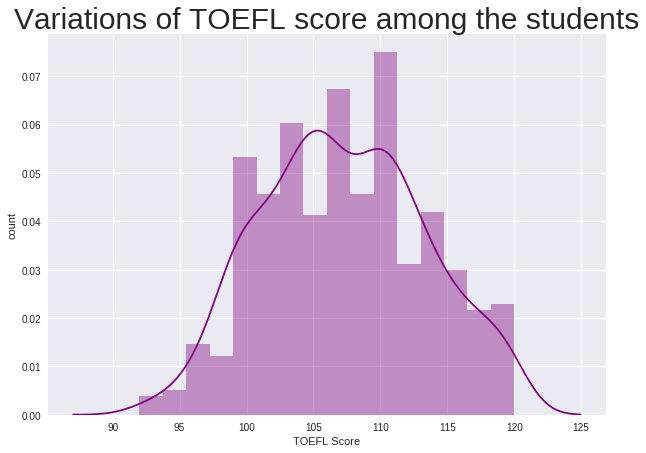

In [0]:
# looking at the variations of toefl score among the students

sns.distplot(data['TOEFL Score'], color = 'purple')
plt.title('Variations of TOEFL score among the students', fontsize = 30)
plt.xlabel('TOEFL Score')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


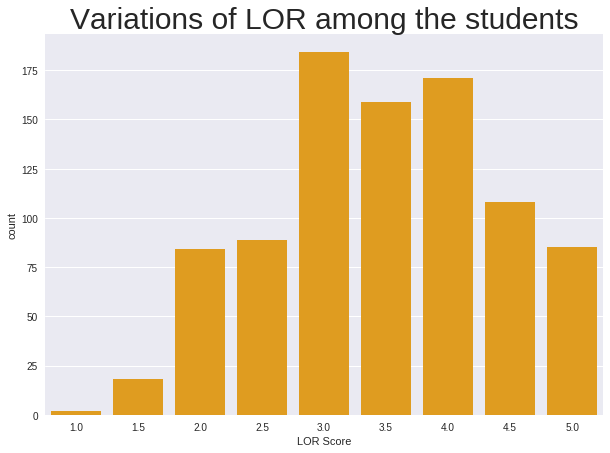

In [0]:
# looking at the variations of LOR among the students

sns.countplot(data['LOR '], color = 'orange')
plt.title('Variations of LOR among the students', fontsize = 30)
plt.xlabel('LOR Score')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


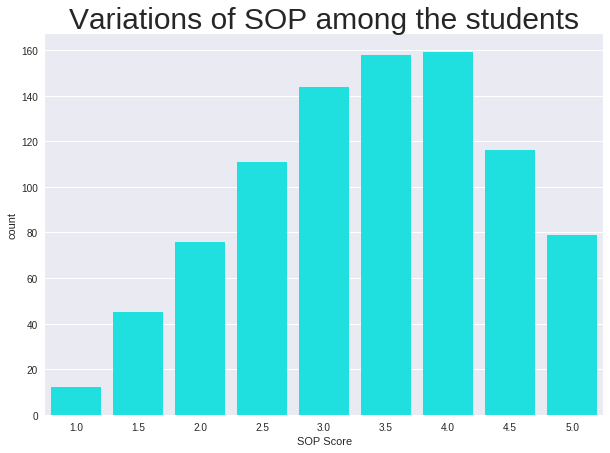

In [0]:
# looking at the variations of SOP among the students

sns.countplot(data['SOP'], color = 'cyan')
plt.title('Variations of SOP among the students', fontsize = 30)
plt.xlabel('SOP Score')
plt.ylabel('count')
plt.show()

In [0]:
data['Research'].value_counts()

1    499
0    401
Name: Research, dtype: int64

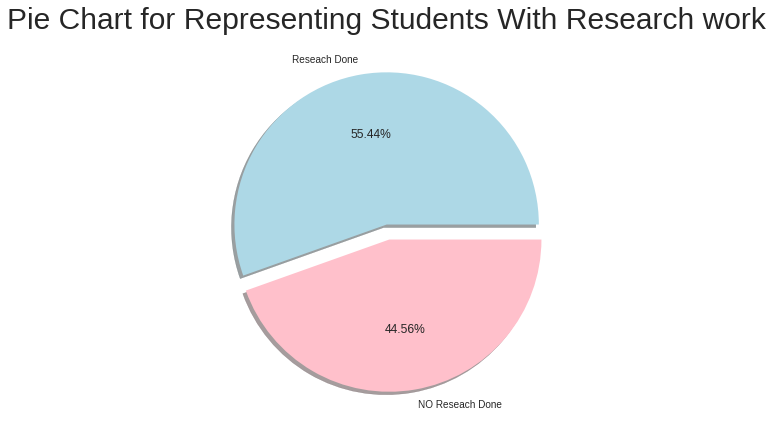

In [0]:
# making a pie chart for the analysis of students rather they did research or not.

size = [499, 401]
labels = "Reseach Done", "NO Reseach Done"
colors = ['lightblue', 'pink']
explode = [0, 0.1]

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Pie Chart for Representing Students With Research work', fontsize = 30)
plt.axis('off')
plt.show()

In [0]:
data['University Rating'].value_counts()

3    295
2    233
4    179
5    133
1     60
Name: University Rating, dtype: int64

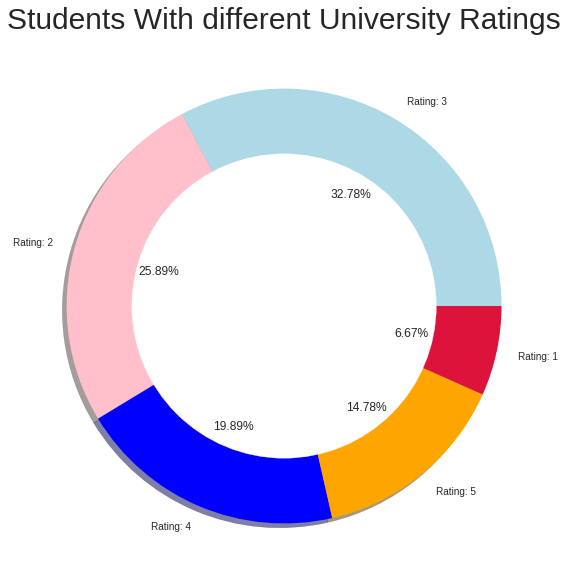

In [0]:
# making a donut chart for the analysis of students with different university ratings

size = [295, 233, 179, 133, 60]
labels = "Rating: 3", "Rating: 2", "Rating: 4", "Rating: 5", "Rating: 1"
colors = ['lightblue', 'pink', 'blue', 'orange', 'crimson']

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Students With different University Ratings', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('off')
plt.show()

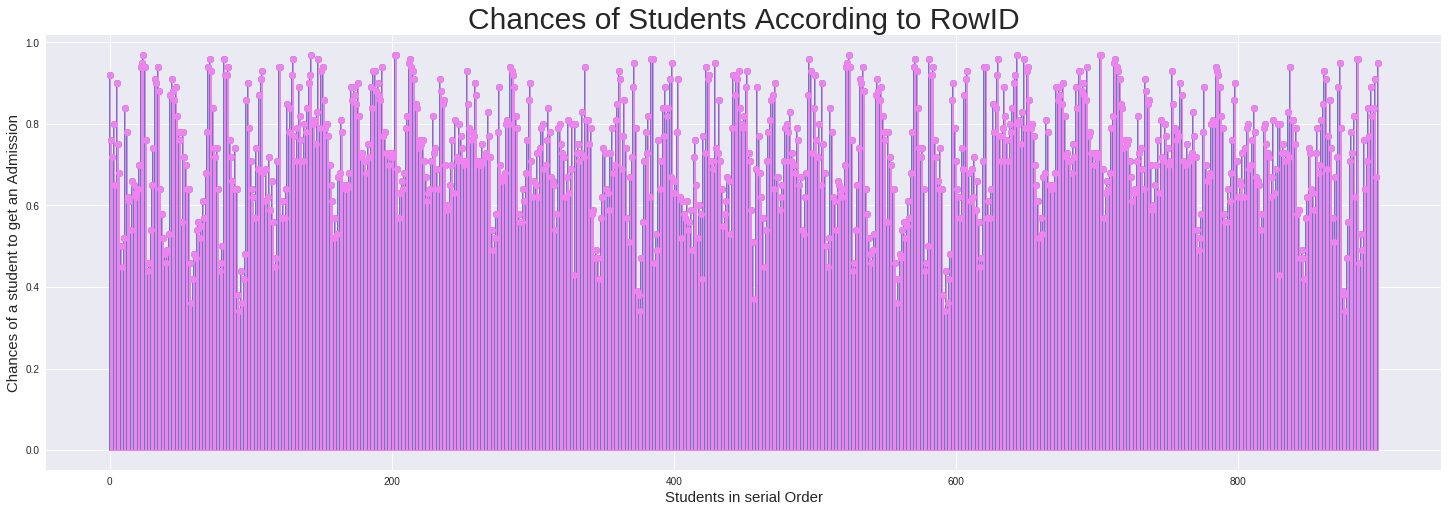

In [0]:
# Analyzing the Chances of Admission

plt.rcParams['figure.figsize'] = (25, 8)
plt.stem(data['Chance of Admit '])
stemlines = plt.stem(data['Chance of Admit '])
plt.setp(stemlines, color = 'violet', linewidth = 1)
plt.title('Chances of Students According to RowID', fontsize = 30)
plt.xlabel('Students in serial Order', fontsize = 15)
plt.ylabel('Chances of a student to get an Admission', fontsize = 15)
plt.show()

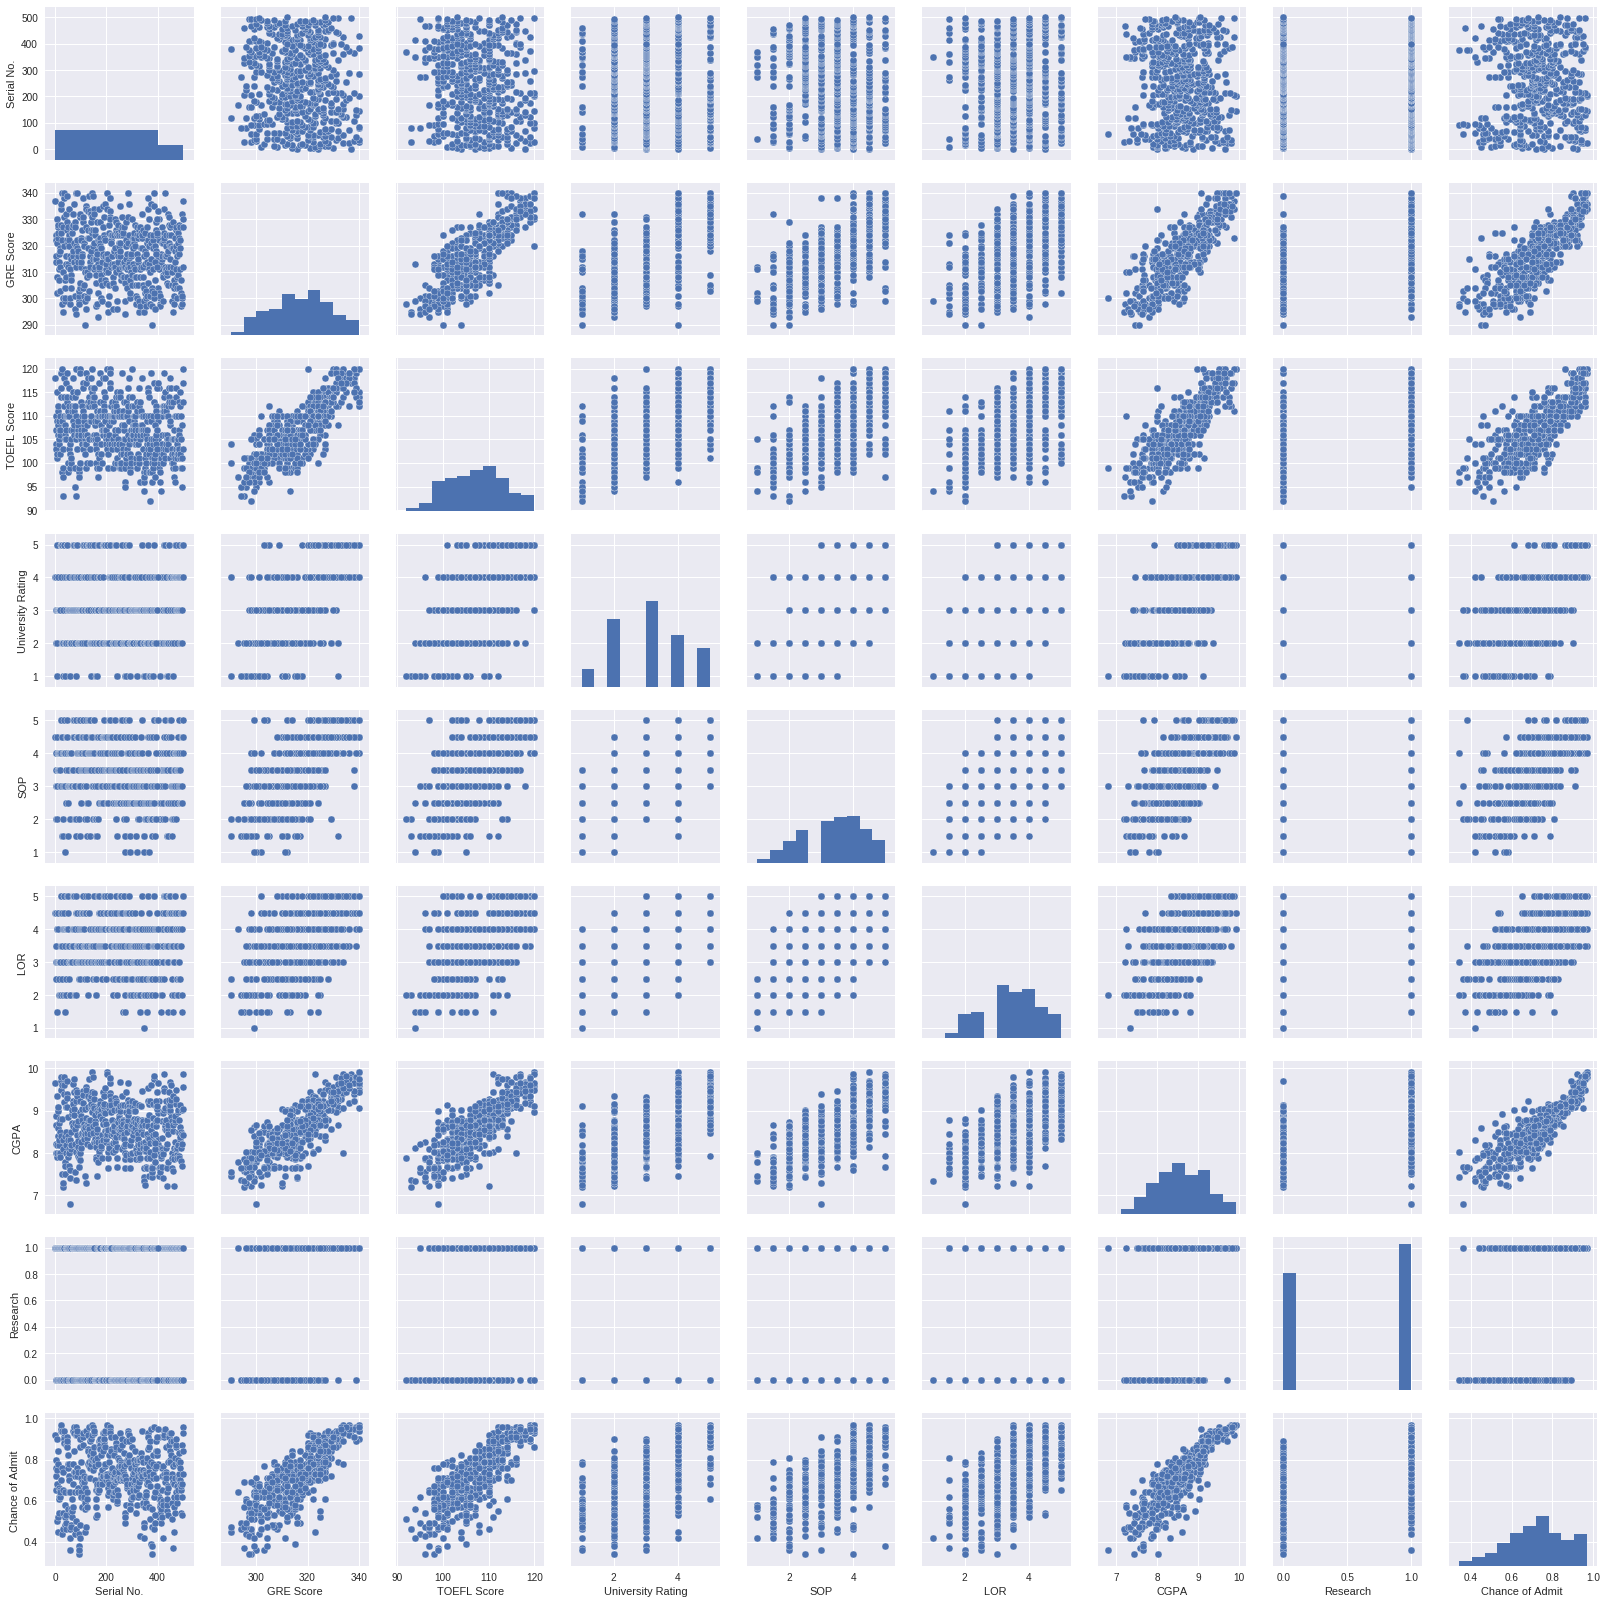

In [0]:
# plotting a pair plot to see the correlations

sns.pairplot(data)

In [0]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

Text(0.5, 1.0, 'HeatMap to show the Importance of Attributes Determing Admission')

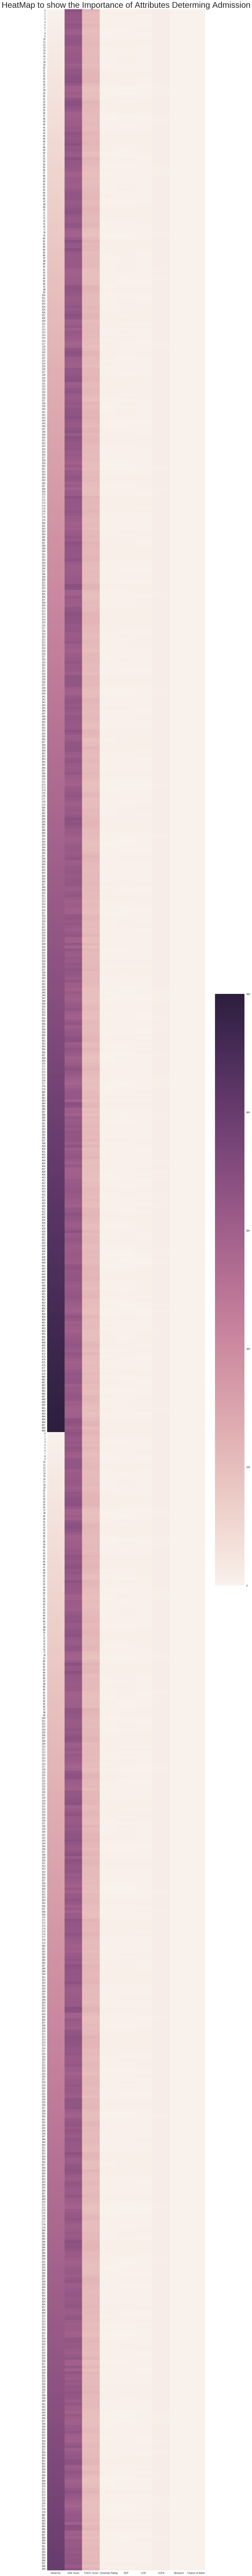

In [0]:
# plotting a heat map

# heatmap between GRE Score and Chance of Admission
plt.rcParams['figure.figsize'] = (15, 200)
sns.heatmap(data)
plt.title('HeatMap to show the Importance of Attributes Determing Admission', fontsize = 35)

# the plot shows that GRE Score, TOEFL Score and CGPA matters the most

**Data Preprocessing**

In [0]:
# splitting the data into dependent and independent datasets

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# getting the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (900, 8)
Shape of y:  (900,)


In [0]:
# splitting into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (720, 8)
Shape of x_test : (180, 8)
Shape of y_train : (720,)
Shape of y_test : (180,)


In [0]:
# standard Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [0]:
# pca
 '''
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

'''

'\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components = None)\nx_train = pca.fit_transform(x_train)\nx_test = pca.transform(x_test)\n\n'

**Modelling**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


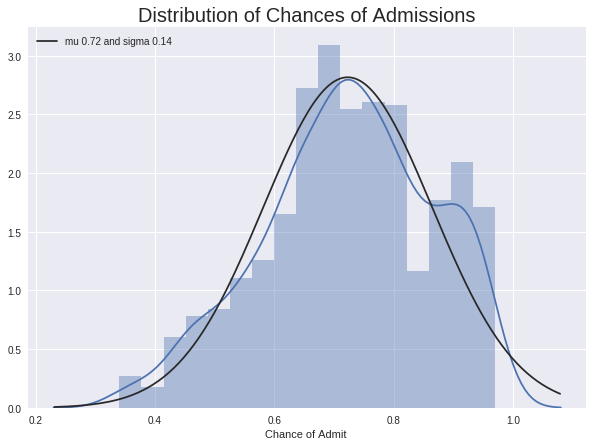

In [0]:
# plotting the dist plot of admissions with normal curve

from scipy import stats
from scipy.stats import norm

plt.rcParams['figure.figsize'] = (10, 7)
sns.distplot(data['Chance of Admit '], fit = norm)

# getting the mu, and sigma related to the curve
mu, sigma = norm.fit(data['Chance of Admit '])
plt.legend(["mu {:.2f} and sigma {:.2f}".format(mu, sigma)], loc = 2)

plt.title('Distribution of Chances of Admissions', fontsize = 20)
plt.show()

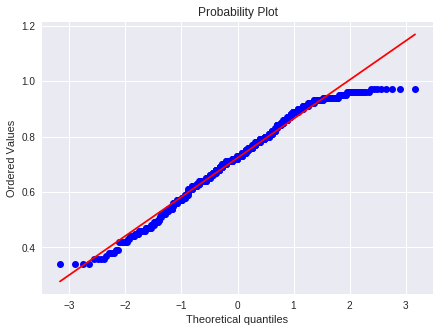

In [0]:
# plotting the QQ Plot

from scipy import stats

plt.rcParams['figure.figsize'] = (7, 5)
stats.probplot(data['Chance of Admit '], plot = plt)
plt.show()

**Linear Regression**

In [0]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(x_train, y_train)

linreg_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, linreg_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)


Root Mean Squared Error :  0.054486088789783865
R-Squared Error: 0.8525558015572245


**Support Vector Machine**

In [0]:
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

svr = SVR(kernel = 'linear')
svr.fit(x_train, y_train)

svr_pred = svr.predict(x_test)

mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.05933650014294624
R-Squared Error: 0.8251360539686192


**Random Forest Regression**

In [0]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

rfr_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, rfr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rfr_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.054486088789783865
R-Squared Error: 0.8525558015572245


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Xg-Boost **

In [0]:
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

mse = mean_squared_error(y_test, xgb_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.03959080295682245
R-Squared Error: 0.9221524335004596


**Extra Trees Classifier**

In [0]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)

etr_pred = etr.predict(x_test)

mse = mean_squared_error(y_test, etr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, etr_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.028663178082302343
R-Squared Error: 0.9591957776810693


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Stacking of Models**

In [0]:
# stacked predictions

stacked_predictions = np.column_stack((linreg_pred, svr_pred, rfr_pred))

# specifying the meta model
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_test)

# final predictions
stacked_predictions = (meta_model.predict(stacked_predictions))

mse = mean_squared_error(y_test, stacked_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, stacked_predictions)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)


Root Mean Squared Error :  0.05333081058149043
R-Squared Error: 0.85874208537342


**Boosting the Model**

In [0]:
Boosted_predictions = stacked_predictions*0.2 + xgb_pred*0.3 + etr_pred*0.5

mse = mean_squared_error(y_test, Boosted_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Boosted_predictions)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.030852320072924565
R-Squared Error: 0.9527249411932506
